<a href="https://colab.research.google.com/github/neutro-jina/study_log/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%94%A5%EB%9F%AC%EB%8B%9D_18%EC%9E%A5_%EB%A1%9C%EC%9D%B4%ED%84%B0_%EB%89%B4%EC%8A%A4_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2121728/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/20
90/90 [==============================] - 11s 19ms/step - loss: 2.5777 - accuracy: 0.3498 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 11ms/step - loss: 2.0392 - accuracy: 0.4906 - val_loss: 1.9849 - val_accuracy: 0.5009
Epoch 3/20
90/90 [==============================] - 1s 11ms/step - loss: 1.9038 - accuracy: 0.5122 - val_loss: 1.7969 - val_accuracy: 0.5454
Epoch 4/20
90/90 [==============================] - 1s 11ms/step - loss: 1.7316 - accuracy: 0.5533 - val_loss: 1.7229 - val_acc

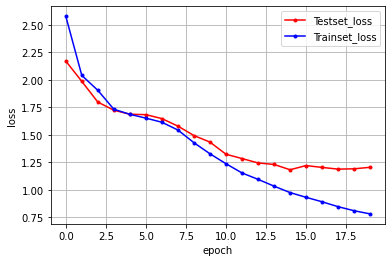

In [1]:
# 18장. 순환 신경망(RNN)_LSTM을 이용한 로이터 뉴스 카테고리 분류하기

# 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제를 해결하기 위해 순환 신경망(Recurrent neutral network) 방법이 고안됨
# 순환신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법이다. 
# 그리고 별도의 가중치를 줘서 다음 데이터로 넘어간다. 모든 입력 값에 이 작업을 실행하므로 같은 층 안에서 맴도는 성질때문에 순환 신경망이라 불림
# RNN의 결과를 개선하기 위해 LSTM(long short term memory)방법을 함께 사용하는 기법이 현재 널리 사용되고 있다.
# LSTM은 한 층 안에서 반복을 많이 해야 하는 rnn의 특성상 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완하였다.
#즉, 반복 되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단게를 하나 더 추가하는 것이다.


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#num_words=1000의미? 1~1000에 해당하는 빈도의 단어만 선택해서 불러오는 것. 


# 데이터 확인하기
category = numpy.max(Y_train) + 1 #0부터 세기때문에 1을 더해준다.
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
# 각 기사의 단어 수가 제각각 다르므로 이를 동일하게 맞춰야 한다. 이 때에 데이터 전처리 함수 sequence()를 이용함.
# maxlen=100은 단어 수를 100개로 맞추라는 뜻. 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버린다. 모자란 부분은 0으로.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100)) 
#Embedding(불러올 단어의 총 개수, 기사당 단어 수)층은 데이터전처리를 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환.
model.add(LSTM(100, activation='tanh'))
# LSTM(기사당 단어 수, 기타 옵션)의 형식으로 적용됨.
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()